In [ ]:
import pandas as pd

df = pd.read_csv("/content/fraud_oracle.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Now I will drop the columns which doesn't carry any meaning So first There are three irrelevant columns i found.

*   PolicyNumber:
It's just a unique identifier for each policy.Every Row has a diffrent number, so it doesn't carry any pattern or relationship with fraud.Keeping it would only confuse the model, because the model might try to learn from random IDs.



*   RepNumber:
This looks like an internal reference or agent ID.
Like PolicyNumber,it acts as an identifier rather than a feature with predictive values.it doesn't help in distinguishing fraud vs non-fraud cases.

In [ ]:
df = df.drop(columns=['PolicyNumber','RepNumber'])

Fraud Dataset Doesn't exist missing value so i can artificially introduce missingness.

In [ ]:
import numpy as np

#Convert placeholders to NaN
df.replace(["?","NA","Unknown",""], np.nan , inplace=True)

#Introduce 5% missingness in a categorical column
df.loc[df.sample(frac=0.05, random_state=1).index ,'PolicyType'] = np.nan
df.loc[df.sample(frac=0.05, random_state=2).index,'VehicleCategory'] = np.nan
df.loc[df.sample(frac=0.05, random_state=3).index, 'PoliceReportFiled'] = np.nan

Missing Values were added to PolicyType,VehicleCategory and PoliceReportFiled because in real insurance data these fields are often incomplete or uncertain, making them realistic for imputation practice

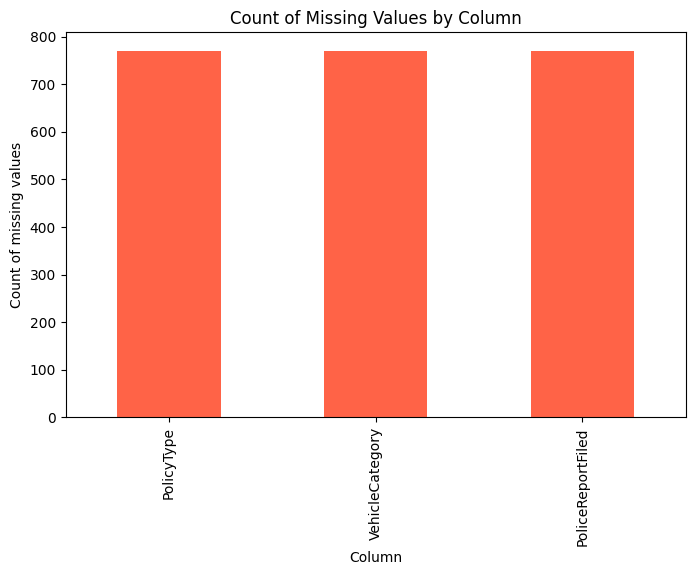

In [ ]:
import matplotlib.pyplot as plt

#Count missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(8,5))
missing_counts.plot(kind='bar',color='tomato')
plt.title('Count of Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Count of missing values')
plt.show()

In [ ]:
for col in ['PolicyType','VehicleCategory','PoliceReportFiled']:
  df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-3831096359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


/tmp/ipython-input-3529927196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
/tmp/ipython-input-3529927196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
/tmp/ipython-input-3529927196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


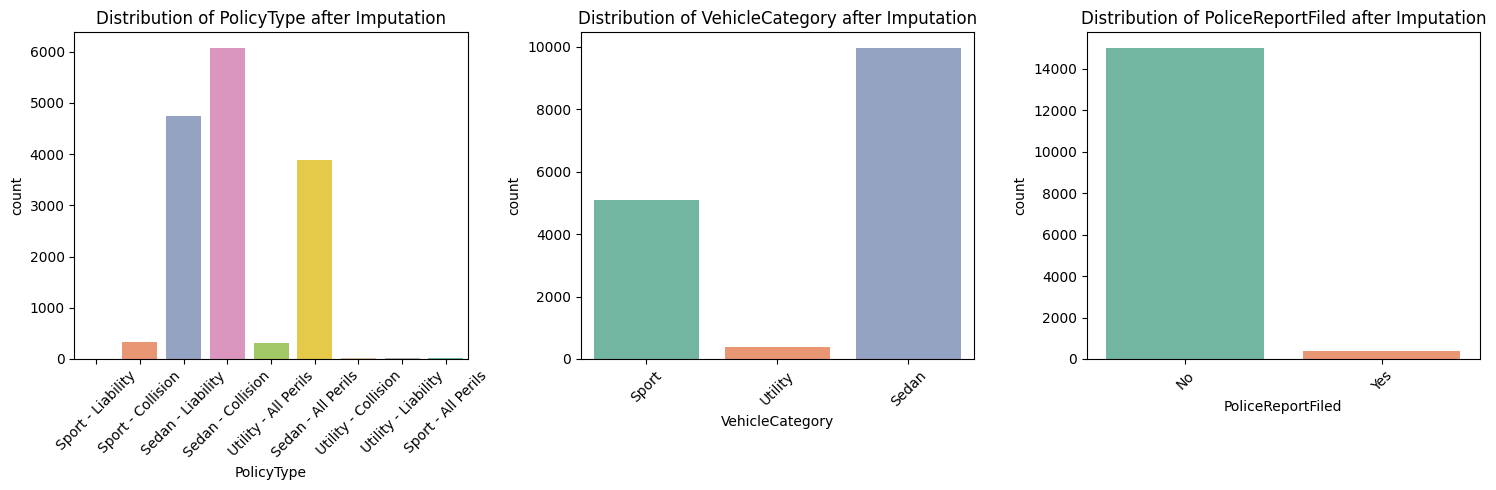

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['PolicyType', 'VehicleCategory', 'PoliceReportFiled']

plt.figure(figsize=(15,5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col} after Imputation")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Here, We filled null values with mode  so we can easily train our model.After the imputation again we're plotting all three columns to check that properly replace the values.In PolicyType it shows how many customers belongs to each category.The distribution looks better across some categories but certain types of category it will dominate.In VehicleCategory categories like sedan,sports,car,utility are shown sedan appears to dominate the dataset means it has tallest bar but most policies involve standard cars, while sports cars and utility vehicle are fewer.In PoliceReportFiled categories are Yes or No.Most values are no meaning in most incidents, no police report was filed.A smaller fraction has Yes.



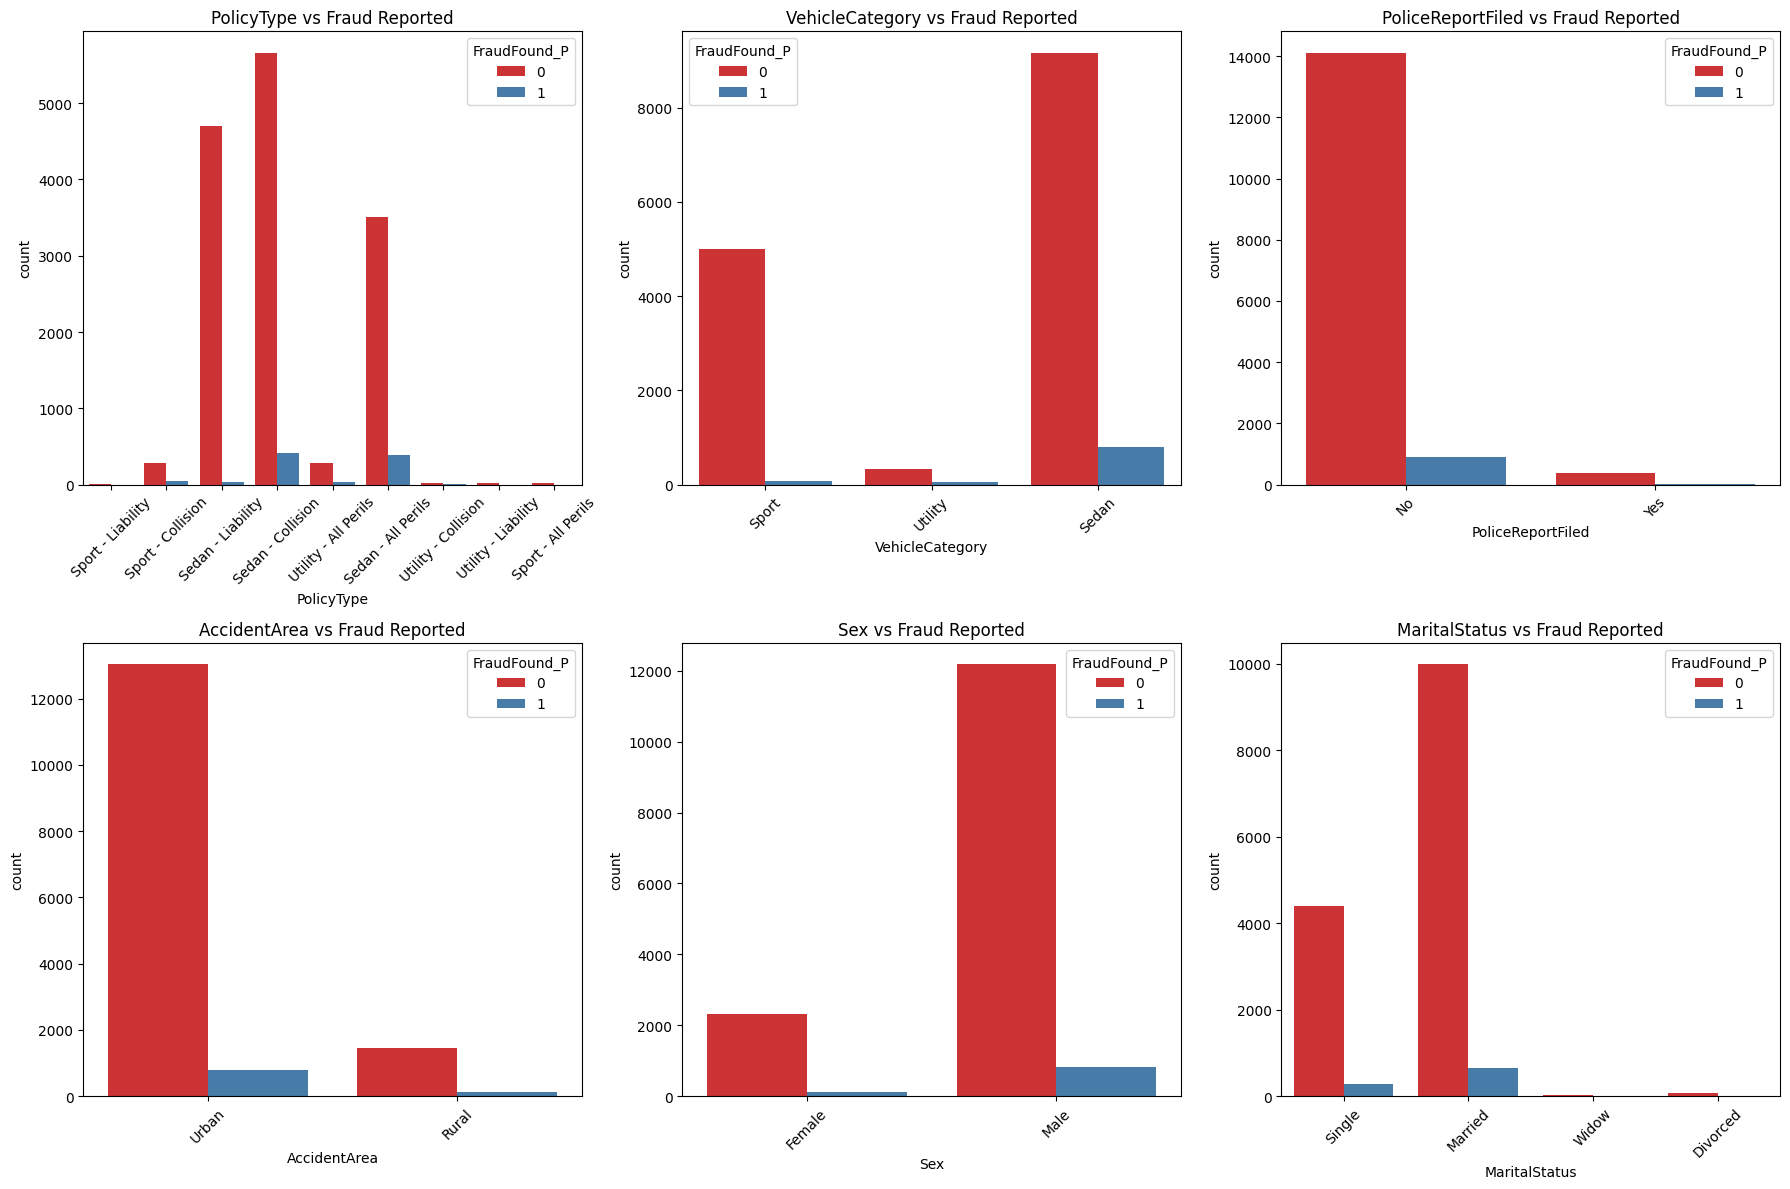

In [ ]:
categorical_cols = [
    "PolicyType",
    "VehicleCategory",
    "PoliceReportFiled",
    "AccidentArea",
    "Sex",
    "MaritalStatus"
]
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="FraudFound_P", data=df, palette="Set1")
    plt.title(f"{col} vs Fraud Reported")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In first Plot we could say that when count is smaller fraud ratio is low but when it increase like some luxury category that show higher fraud ratio making them potential fraud risk indicators. In seconed plot the fraud ratio is significantly higher in luxury cars compared to others.In third plot fraud is more visible when policeReportFiled = Yes. In fourth plot most accidents occurs in urban areas and its also concentrated in Urban, less in rural. Fraud risk is higher in urban regions. In 5th plot Fraud proportion is slightly higher for males than females.In 6th plot Fraud is proportionally higher among Single policyholders than Married

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Separate features and target
X = df.drop("FraudFound_P", axis=1)
y = df["FraudFound_P"]

# 2. Identify categorical & numerical columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

# 3. Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("numerical", StandardScaler(), num_cols),
    ],
    remainder="drop"   # drop any unlisted columns
)

# 4. Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Categorical Columns: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Columns: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'Deductible', 'DriverRating', 'Year']
Train shape: (12336, 30)
Test shape: (3084, 30)


In this step we applied train-test split so first in X we removed Target column except that column X will take all column and In y it has Target columns. After we found which column are categorical and which are numerical.after created preprocessing setup OneHotEncoder for categorical + Scaling for numerical. Split data into training/testing while keeping fraud ratio balanced

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # use imblearn's pipeline for SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import pandas as pd

# Define models
models = {
    "SVM": SVC(probability=True, random_state=42, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced")
}

results = []
conf_matrices = {}
roc_curves = {}

# Loop through models
#A Pipeline in scikit-learn chains multiple steps together so that preprocessing, resampling, and modeling happen in one workflow.
for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),   # handle imbalance
        ("classifier", model)
    ])

    # Train
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1])

    # Confusion Matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr)

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nModel Comparison after SMOTE:\n")
print(results_df)



Model Comparison after SMOTE:

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.903048   0.200000  0.205405  0.202667
1  Decision Tree  0.891375   0.155963  0.183784  0.168734
2    Naive Bayes  0.153696   0.061483  0.918919  0.115254
3            KNN  0.623541   0.111465  0.756757  0.194310
4  Random Forest  0.940661   0.750000  0.016216  0.031746


For model comparison I got all values properly after applied SMOTE so Its stands for Synthetic Minority Oversampling Technique So this generated synthetic fraud sample so that your model can learn to detect them better why we applied this because befor smote SVM decision tree and Random forest had Low precision recall F1 but Recall is most important than accuracy.So its goes inside the pipeline and balances fraud vs non-fraud.In naive bayes we achieved high recall means catches almost all fraud cases.But very low precision means many transaction belongs to normal its also count in fraud transaction.It is good but zero missed fraud but too noisy in real-world use.In random forest very high accuracy 0.94 achieved and high precision correct when it predict fraud.but recall is too low so it misses almost all fraud. SVM has almost balanced results accuracy 0.90,precision 0.20, recall 0.20.
still not great but more balanced.
decision tree similar to SVM but its not the best choice.KNN reacall is good catches most frauds but precsion is low lots of false positives.Accuracy is moderate 0.62.

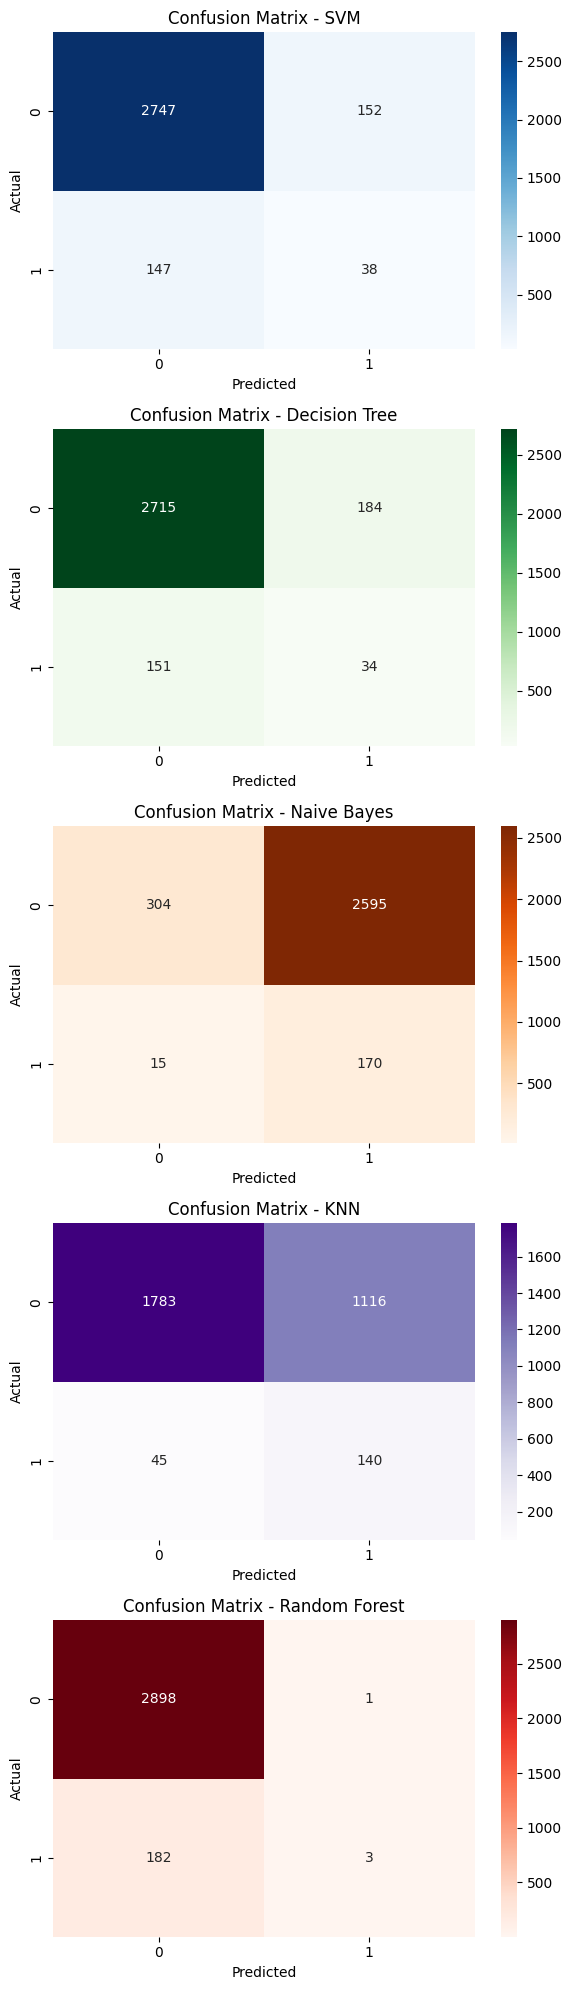

In [ ]:
color_maps = ["Blues", "Greens", "Oranges", "Purples", "Reds"]

fig, axes = plt.subplots(len(conf_matrices), 1, figsize=(6, 20))  # vertical layout

for i, (name, cm) in enumerate(conf_matrices.items()):
    cmap = color_maps[i % len(color_maps)]  # cycle if models > colormaps
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Basic confusion matrix defination is how well your classification model predicted compared to the actual results.There are four prediction categories.In SVM True Negative value is 2747 so It is correctly predicted safe no fraud. After False Positive value is defined as 152 its flagged safe as fraud. False Negative misses 147 fraud important cases. and last True positive 38 frauds correctly caught.Hence SVM is detects fraud fairly well but still misses some FN.

Decision Tree similar as SVM. Naive Bayes TN=304 Correctly predicted 304 safe (non-frauf) cases.FP = 2595 worngly flagged 2595 safe cases as fraud.FN=15 Missed 15 fraud cases failed to detect.
TP=170 correctly detected 170 fraud cases.In KNN confusion matrix TN = 1783 correctly predicted 1783 safe cases.
FP = 1116 wrongly flagged 1116 safe cases as fraud. FN = 45 Missed actual Fraud cases TP = 140 correctly detected 140 fraud cases. In conclusion i'll go with two models depending on tasks where fraud detection comes into the task KNN is better for it.if no importance of fraud prediction and if we want no fake fraud report ad we want to predicts most cases as safe so random forest is best option according to confusion matrix.

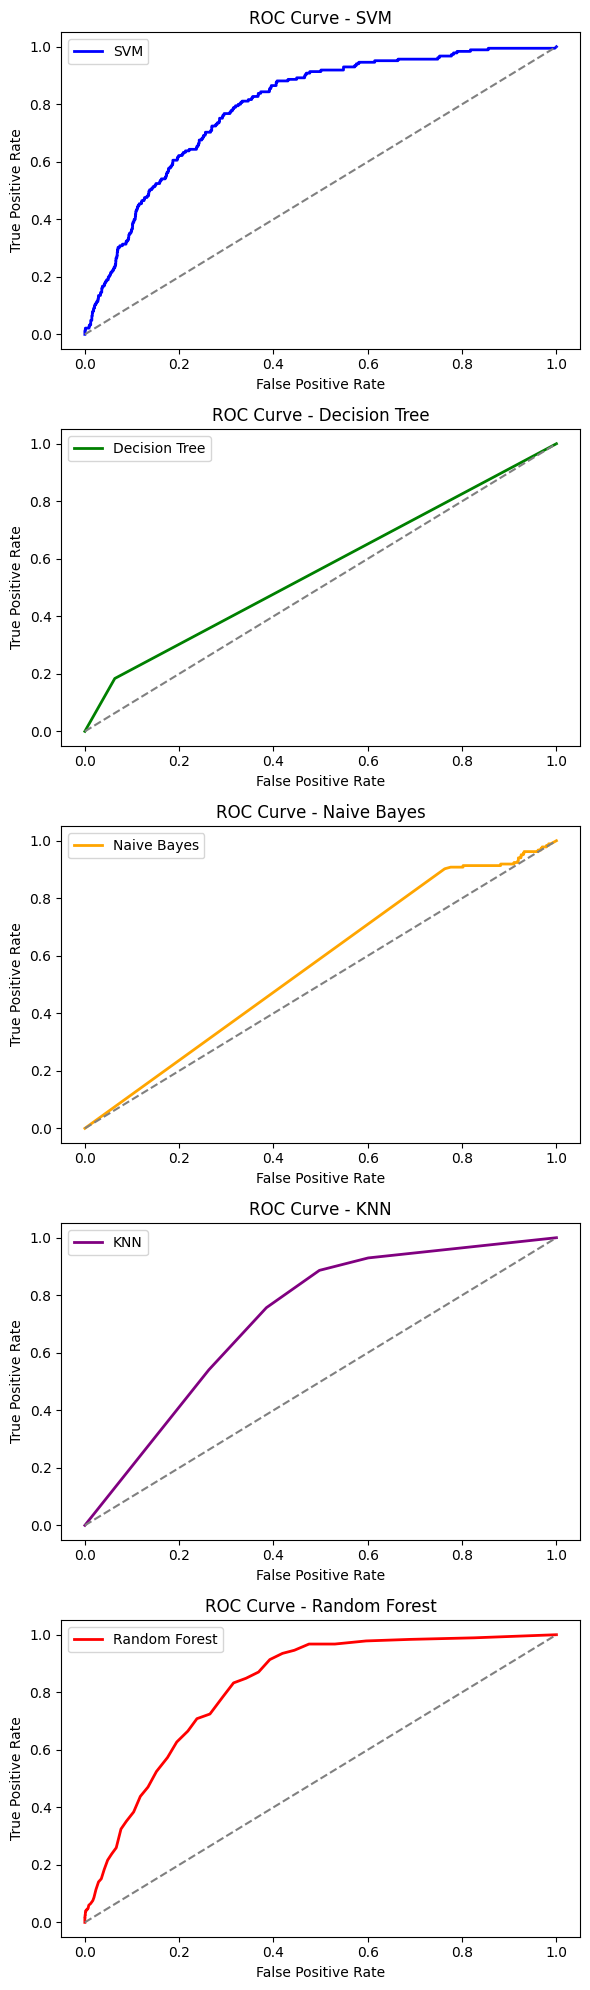

In [ ]:
colors = ["blue", "green", "orange", "purple", "red"]

fig, axes = plt.subplots(len(roc_curves), 1, figsize=(6, 20))  # vertical layout

for ax, (name, (fpr, tpr)), color in zip(axes, roc_curves.items(), colors):
    ax.plot(fpr, tpr, label=f"{name}", color=color, linewidth=2)
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray")
    ax.set_title(f"ROC Curve - {name}")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()

plt.tight_layout()
plt.show()


SVM model performs well but it has a good balance between sensitivity and specificity.it's much better than random guessing though not perfect so some false positive and false negatives still exist.

Decision Tree Model is not performing well. Its ROC curve shows low predictive,meaning it often confuses positives and negatives.

Naive Bayes ROC overlaps with the diagonal line and it does not upwards towards the top-left, which shows very weak classification power.

KNN ROC Curve rises above the diagonal but not very steeply.it bends upward moderately,showing that KNN has some classification power but weaker than SVM.

Random Forest ROC the curve rises sharply towards the top-left corner.this means random forest is classifying very well with a strong tradeoff between TPR and FPR.